In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import variation
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
wines = pd.read_csv('wines_SPA.csv')

In [3]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
wines.dropna(subset=['year', 'body'] ,inplace= True)

In [5]:
wines.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [6]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [7]:
wines[wines['year'] == 'N.V.']

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Espana,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,N.V.,4.7,58,Espana,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,N.V.,4.7,42,Espana,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,N.V.,4.7,41,Espana,Manzanilla,95.57,Sherry,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,N.V.,4.6,74,Espana,Jerez-Xeres-Sherry,189.99,Sherry,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7388,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
7413,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
7438,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
7463,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0


In [8]:
print('Skewness')
for i in wines.select_dtypes(include = np.number).columns:
    print(i, ':' ,wines[i].skew())

Skewness
rating : 2.3051169779192584
num_reviews : 20.025775413207377
price : 8.931793830217902
body : -0.1989791317677213
acidity : -5.017704729301852


In [9]:
print('Kurtosis')
for i in wines.select_dtypes(include = np.number).columns:
    print(i, ':' ,wines[i].kurt())

Kurtosis
rating : 4.8074516359066735
num_reviews : 709.0385257029699
price : 105.65241472589462
body : 0.4823868636862034
acidity : 27.013358140286947


rating : 2.3051169779192584


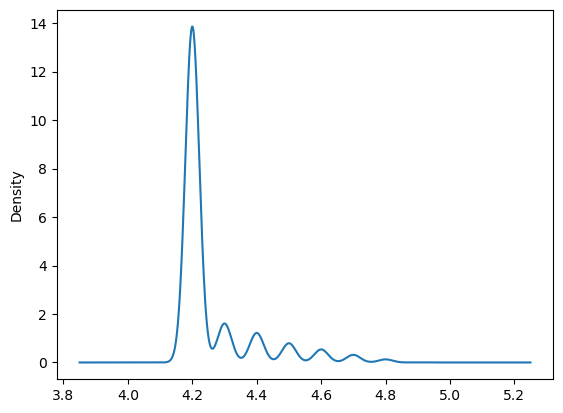

num_reviews : 20.025775413207377


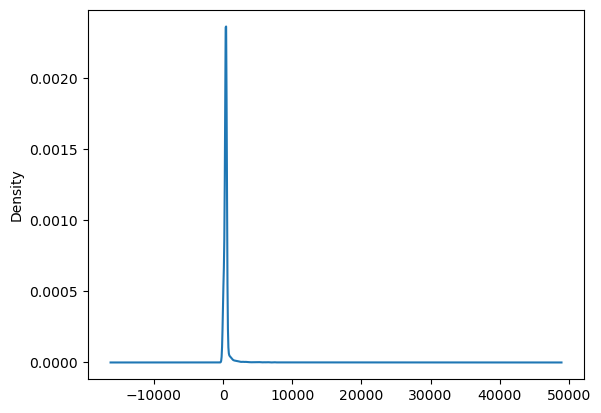

price : 8.931793830217902


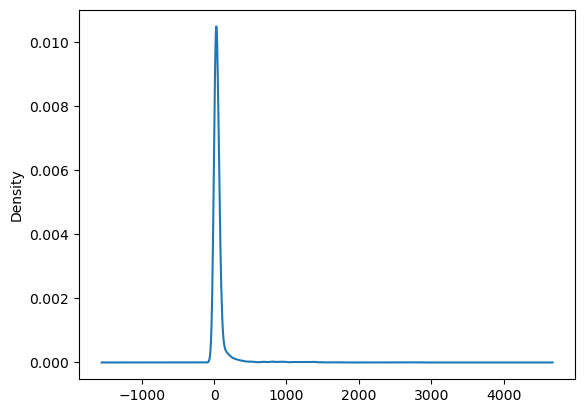

body : -0.1989791317677213


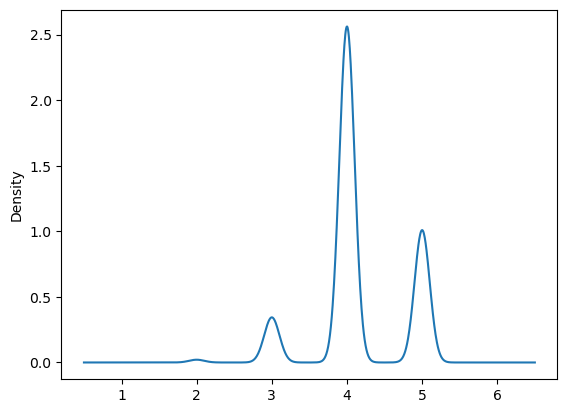

acidity : -5.017704729301852


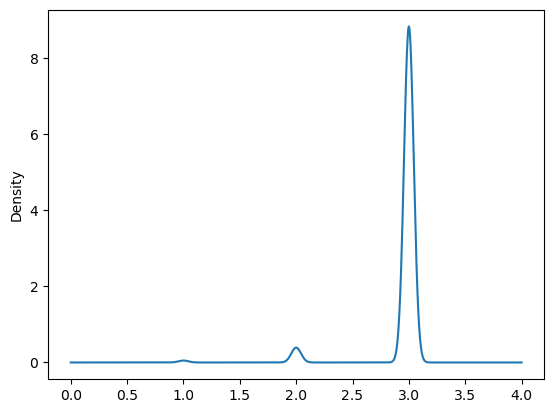

In [10]:
for i in wines.select_dtypes(include = np.number).columns:
    print(i, ':' ,wines[i].skew())
    wines[i].plot(kind='kde')
    plt.show()

rating : 4.8074516359066735


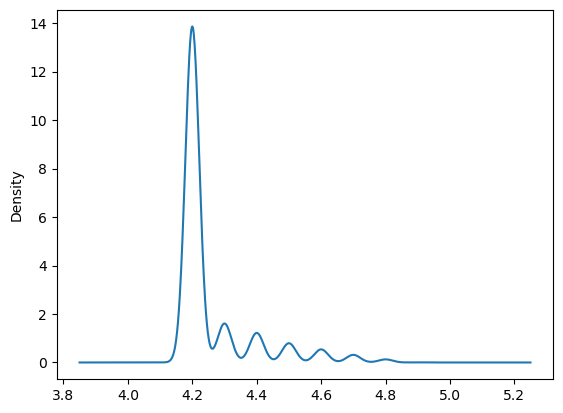

num_reviews : 709.0385257029699


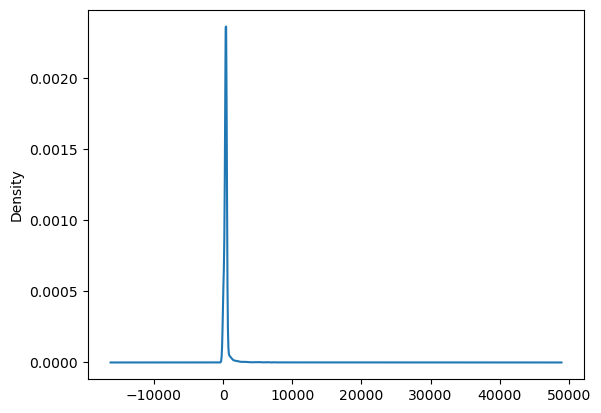

price : 105.65241472589462


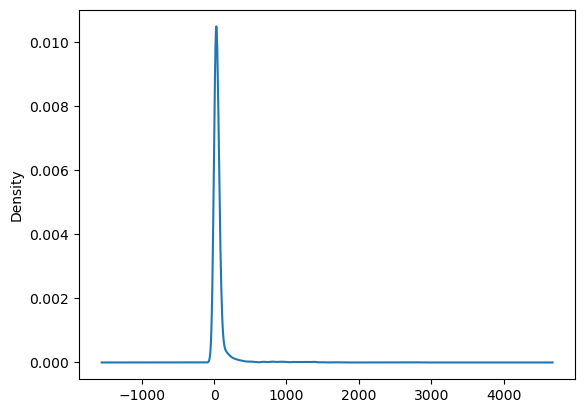

body : 0.4823868636862034


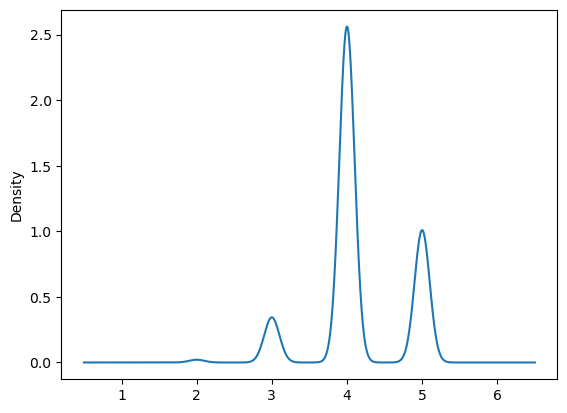

acidity : 27.013358140286947


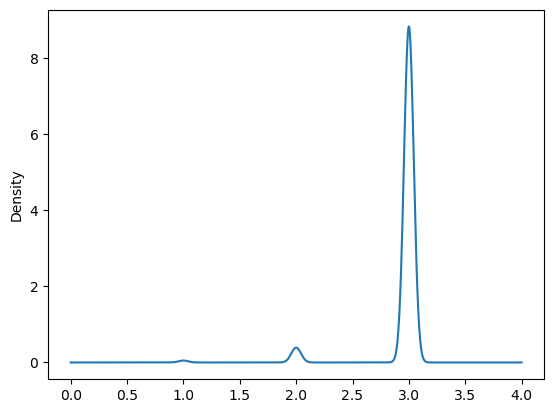

In [155]:
for j in wines.select_dtypes(include = np.number).columns:
    print(j, ':' ,wines[j].kurt())
    wines[j].plot(kind = 'kde')
    plt.show()

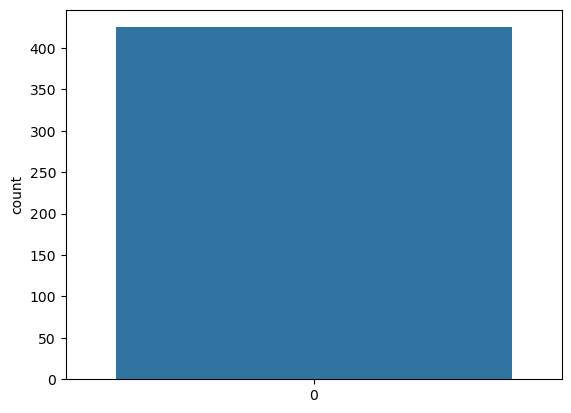

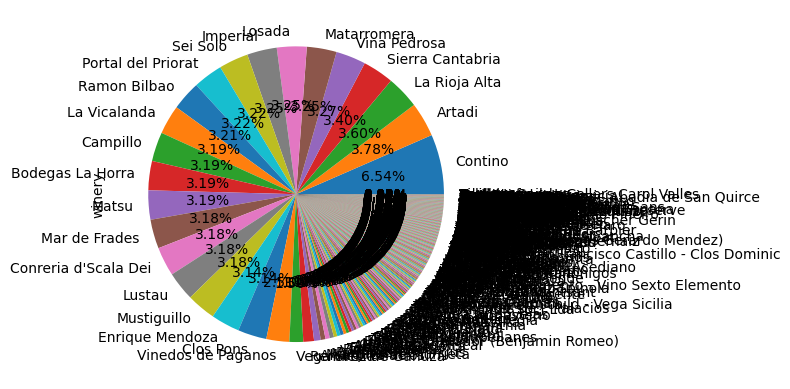

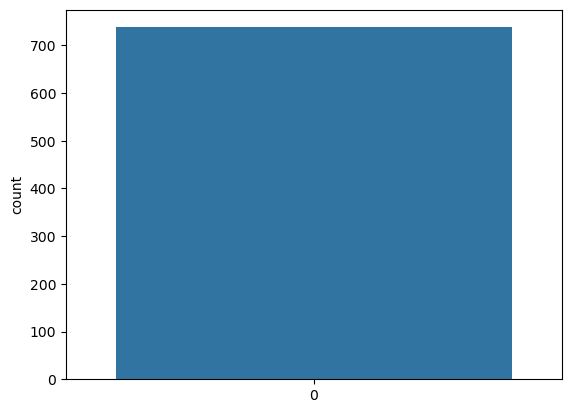

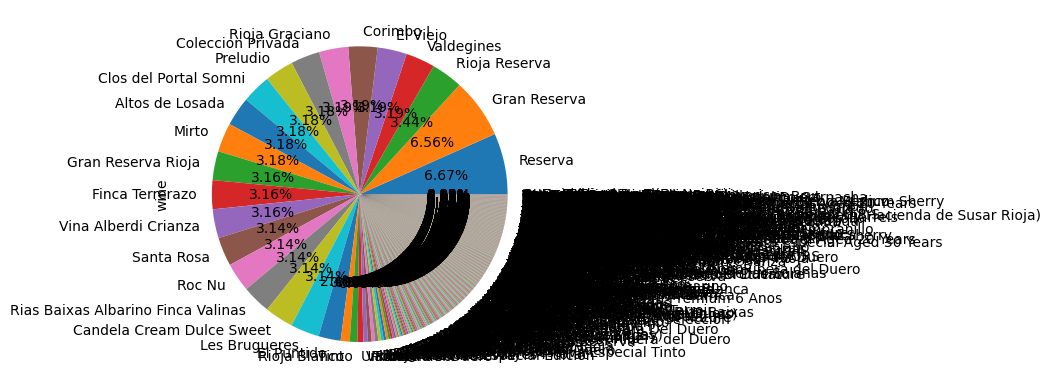

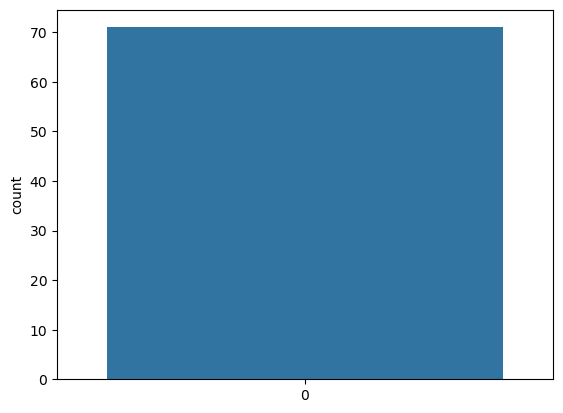

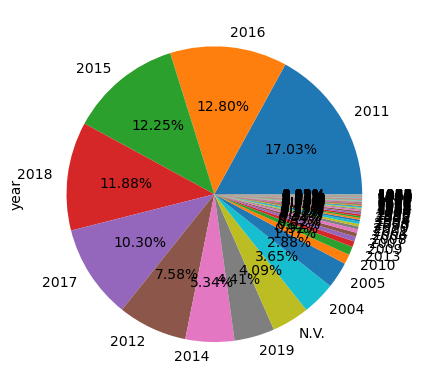

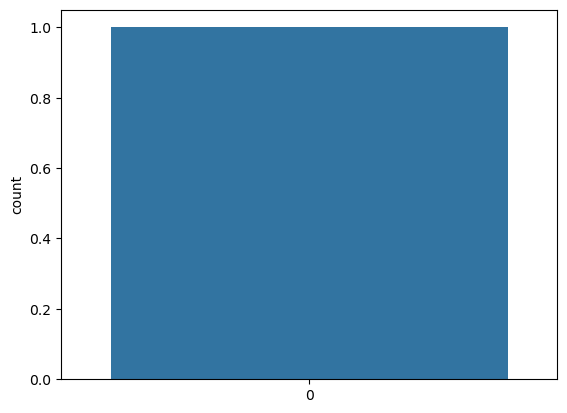

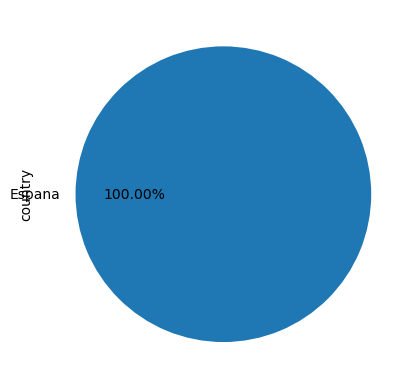

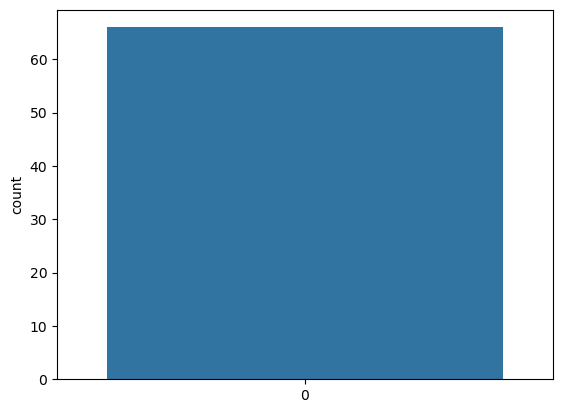

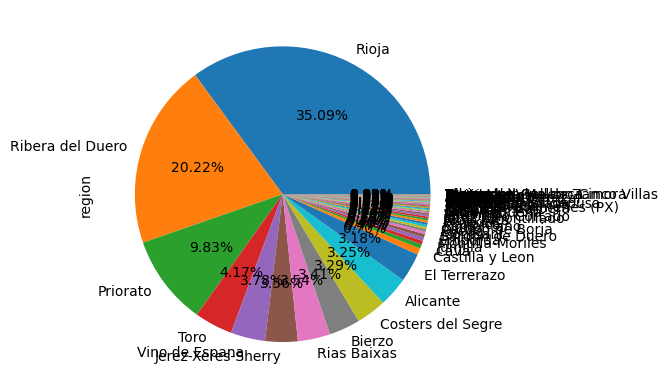

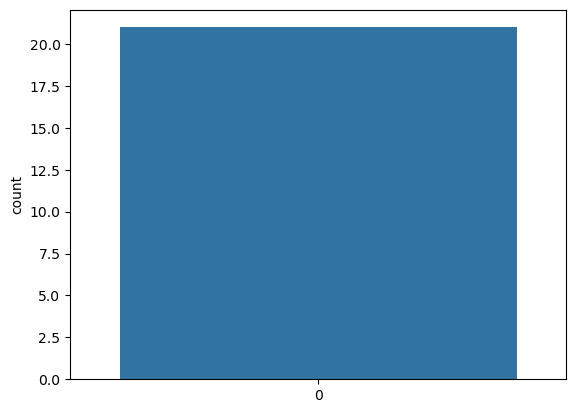

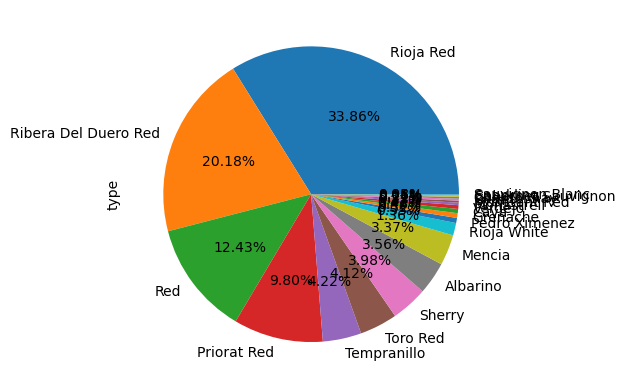

In [11]:
for i in wines.select_dtypes(exclude = np.number).columns:
    sns.countplot(wines[i].value_counts())
    plt.show()
    wines[i].value_counts().plot(kind='pie',autopct='%.2f%%')
    plt.show()

In [12]:
wines['rating'].unique()

array([4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2])

In [13]:
q1 = wines.rating.quantile(0.25)
q3 = wines.rating.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
print('IQR: ', iqr , '\nll: ', ll , '\nul: ', ul)

IQR:  0.0 
ll:  4.2 
ul:  4.2


In [14]:
wines['rating'].value_counts()

4.2    4749
4.3     551
4.4     418
4.5     272
4.6     185
4.7     108
4.8      44
4.9       2
Name: rating, dtype: int64

In [15]:
wines['rating_bin'] = wines['rating'].apply(lambda x: 'Average' if (x==4.2) else 'Good' if (x==4.3) or (x==4.4) or (x==4.5) else 'Excellent')

In [16]:
wines[['rating','rating_bin']].value_counts()

rating  rating_bin
4.2     Average       4749
4.3     Good           551
4.4     Good           418
4.5     Good           272
4.6     Excellent      185
4.7     Excellent      108
4.8     Excellent       44
4.9     Excellent        2
dtype: int64

In [17]:
wines['body'].unique()

array([5., 4., 3., 2.])

In [18]:
# wines['body'].apply(lambda x : wine.body.mode()[0] if x.isna() else x)

wines['body'].fillna(wines.body.mode()[0] , inplace=True)

In [19]:
wines['body_bin'] = wines['body'].apply(lambda x : 'Best' if (x==5) or(x==4) else 'Better' if (x==3) else 'Good')

In [20]:
wines['body_bin'].unique()

array(['Best', 'Better', 'Good'], dtype=object)

In [21]:
wines.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
rating_bin     0
body_bin       0
dtype: int64

In [22]:
wines['acidity'].fillna(wines['acidity'].mode()[0] , inplace = True)

In [23]:
wines['acidity'].unique()

array([3., 2., 1.])

In [24]:
wines['acidity_bins'] = wines['acidity'].apply(lambda x : 'High' if x==1 else 'Moderate' if x==2 else 'Low')

In [25]:
wines['acidity_bins'].value_counts()

Low         6027
Moderate     267
High          35
Name: acidity_bins, dtype: int64

In [26]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,rating_bin,body_bin,acidity_bins
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,Excellent,Best,Low
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,Excellent,Best,Moderate
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,Excellent,Best,Low
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,Excellent,Best,Low
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,Excellent,Best,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,Average,Best,Low
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,Average,Best,Low
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,Average,Best,Low
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,Average,Best,Low


# Bivariate Analysis

rating
num_reviews
price
body
acidity


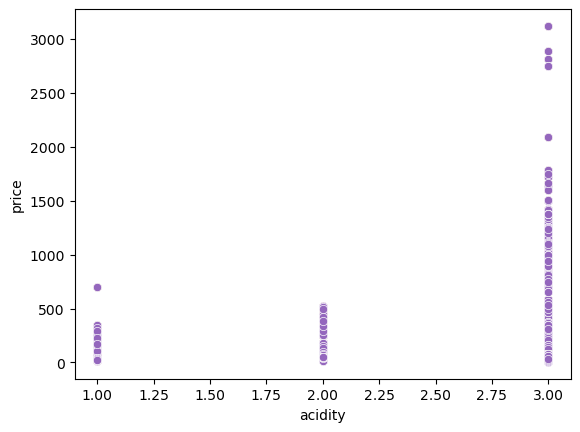

In [27]:
# num vs num
for i in wines.select_dtypes(include = np.number).columns:
    print(i)
    sns.scatterplot(x = wines['acidity'] , y = wines['price'])